In [2]:
!pip install kora -q
!pip install PCA

     |████████████████████████████████| 57 kB 4.6 MB/s 
     |████████████████████████████████| 59 kB 6.6 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=6f322c6e81827af88c24867a23efc15ac7c7bae51b94123b209b5996bbc317e6
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import scipy.stats
import seaborn as sns

import os
import math

from matplotlib.pyplot import figure

In [4]:
#Red pill or blue pill

is_drive = False
cwd = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Datasets/"

while True:
  offon = input("Is this being run offline? (Y = offline (i.e. Jupyter notebook), N = online (i.e. Google Colab notebook)): ")
  try:
    if offon.lower() not in ["y", "n"]:
      raise ValueError
    else:
      if offon.lower() == "n":
        from google.colab import drive
        from kora import drive as drives
        drive.mount('/content/drive')
        is_drive = True
        cwd = str(drives.chdir_notebook())
        cwd = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Datasets/"
      break
  except ValueError:
    print("Error! Please only type one of the following: Y, y, N, n")
  except ModuleError:
    p

Is this being run offline? (Y = offline (i.e. Jupyter notebook), N = online (i.e. Google Colab notebook)): n
Mounted at /content/drive


In [5]:
cwd

'/content/drive/My Drive/CCT/Assignments/Assignment 2/Datasets/'

In [7]:
df1 = pd.read_csv(cwd+"milk dataset 2.csv")
dfn = pd.read_csv(cwd+"netherlands dataset output.csv")

### Variables to consider

#### Average raw value of milk

This statistic determines the average value of the milk produced in Ireland, averaging the domestic pricing of the milk as well as the price used for export of the milk to other EU countries.

In [8]:
df1.describe(include="all")

,Unnamed: 0,Year,Month,Average price of raw milk from Ireland (Euro per 100kg),Butter (Thousand tonnes),Cheese (Thousand tonnes),Domestic milk intake (Million litres),Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Imported milk intake (Million litres),Skimmed & semi-skimmed milk sales (Million litres),Skimmed milk powder (Thousand tonnes),Whole milk sales (Million litres)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,89.500000,2014.000000,6.500000,33.756526,15.448389,17.064444,525.817278,4.08200,465.406833,550.663556,639.654944,735.325444,829.114611,35.723889,15.641111,7.340056,26.898889
std,52.105662,4.332545,3.461682,5.341909,7.501379,9.328856,268.726170,0.29947,75.540932,81.418922,90.253041,100.683867,110.679922,22.480227,1.682370,6.507875,2.358605
min,0.000000,2007.000000,1.000000,21.830000,3.400000,1.100000,114.800000,3.57000,288.000000,361.810000,432.770000,513.350000,603.880000,0.000000,12.100000,0.000000,21.300000
25%,44.750000,2010.000000,3.750000,30.790000,9.725000,7.475000,271.525000,3.85000,408.470000,486.225000,564.997500,663.610000,737.750000,28.200000,14.300000,2.050000,25.275000
50%,89.500000,2014.000000,6.500000,33.700000,14.950000,19.450000,541.050000,4.04000,472.300000,557.490000,655.530000,762.650000,857.380000,36.450000,15.600000,6.000000,26.600000
75%,134.250000,2018.000000,9.250000,37.025000,20.475000,23.500000,702.850000,4.25250,522.902500,610.222500,701.502500,806.475000,909.242500,49.150000,17.100000,10.925000,28.625000
max,179.000000,2021.000000,12.000000,48.650000,31.500000,35.700000,1181.000000,4.90000,643.390000,753.950000,836.960000,926.910000,1019.910000,94.700000,18.900000,27.700000,32.400000


In [9]:
df1 = df1[df1.columns[1:]]
dfn = dfn[dfn.columns[1:]]

In [10]:
translations = {"Average price of raw milk from Ireland (Euro per 100kg)": "Raw milk price",
               "Butter (Thousand tonnes)": "Butter",
                "Cheese (Thousand tonnes)": "Cheese",
               "Calf nuts and cubes (16-18% protein) (Euro per Tonne)": "Calf nuts value",
               "Dairy meal (16-18% protein) (Euro per Tonne)": "Dairy meal value",
               "Dairy nuts and cubes (16-18% protein) (Euro per Tonne)": "Dairy nuts value",
               "Domestic milk intake (Million litres)": "Domestic milk intake",
               "Imported milk intake (Million litres)": "Imported milk intake",
               "Maize meal (Euro per Tonne)": "Maize meal value",
               "Skimmed & semi-skimmed milk sales (Million litres)": "Skimmed milk sales",
               "Skimmed milk powder (Thousand tonnes)": "Skimmed milk powder",
               "Whole milk sales (Million litres)": "Whole milk sales",
               "Skimmed-milk powder (Thousand tonnes)": "Skimmed milk powder",
               "Volume (Thousand tonnes)": "Milk production volume",
               "Concentrated milk (Thousand tonnes)": "Whole milk sales"}

In [11]:
df1

,Year,Month,Average price of raw milk from Ireland (Euro per 100kg),Butter (Thousand tonnes),Cheese (Thousand tonnes),Domestic milk intake (Million litres),Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Imported milk intake (Million litres),Skimmed & semi-skimmed milk sales (Million litres),Skimmed milk powder (Thousand tonnes),Whole milk sales (Million litres)
0,2007,1,28.30,3.8,1.3,123.0,3.87,363.58,431.76,520.38,574.80,661.13,54.6,12.3,2.4,32.1
1,2007,2,27.18,5.0,2.4,185.4,3.87,386.08,462.94,539.81,587.47,646.99,38.0,12.6,1.9,29.3
2,2007,3,25.64,10.1,10.2,386.5,3.80,409.33,474.93,539.83,603.81,670.93,35.8,12.8,5.0,32.4
3,2007,4,27.29,14.8,17.6,581.0,3.59,399.75,457.74,535.86,625.49,690.35,38.7,12.1,10.1,30.4
4,2007,5,29.76,19.1,19.3,688.3,3.62,398.11,461.66,536.39,607.95,673.32,46.9,12.8,13.2,31.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2021,8,39.23,28.8,29.3,917.4,4.19,480.00,598.07,689.20,801.61,913.59,0.0,15.8,16.4,29.0
176,2021,9,42.44,26.5,33.2,776.7,4.43,450.74,570.54,694.88,804.71,915.68,0.0,15.1,11.1,26.6
177,2021,10,46.52,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,0.0,15.8,5.5,26.1
178,2021,11,48.65,17.8,20.9,460.6,4.90,419.66,547.42,641.39,762.83,888.34,0.0,15.4,0.0,25.5


In [13]:
df1 = df1.rename(translations, axis=1)

In [14]:
df1.describe(include="all")

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Imported milk intake,Skimmed milk sales,Skimmed milk powder,Whole milk sales
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2014.000000,6.500000,33.756526,15.448389,17.064444,525.817278,4.08200,465.406833,550.663556,639.654944,735.325444,829.114611,35.723889,15.641111,7.340056,26.898889
std,4.332545,3.461682,5.341909,7.501379,9.328856,268.726170,0.29947,75.540932,81.418922,90.253041,100.683867,110.679922,22.480227,1.682370,6.507875,2.358605
min,2007.000000,1.000000,21.830000,3.400000,1.100000,114.800000,3.57000,288.000000,361.810000,432.770000,513.350000,603.880000,0.000000,12.100000,0.000000,21.300000
25%,2010.000000,3.750000,30.790000,9.725000,7.475000,271.525000,3.85000,408.470000,486.225000,564.997500,663.610000,737.750000,28.200000,14.300000,2.050000,25.275000
50%,2014.000000,6.500000,33.700000,14.950000,19.450000,541.050000,4.04000,472.300000,557.490000,655.530000,762.650000,857.380000,36.450000,15.600000,6.000000,26.600000
75%,2018.000000,9.250000,37.025000,20.475000,23.500000,702.850000,4.25250,522.902500,610.222500,701.502500,806.475000,909.242500,49.150000,17.100000,10.925000,28.625000
max,2021.000000,12.000000,48.650000,31.500000,35.700000,1181.000000,4.90000,643.390000,753.950000,836.960000,926.910000,1019.910000,94.700000,18.900000,27.700000,32.400000


180 180


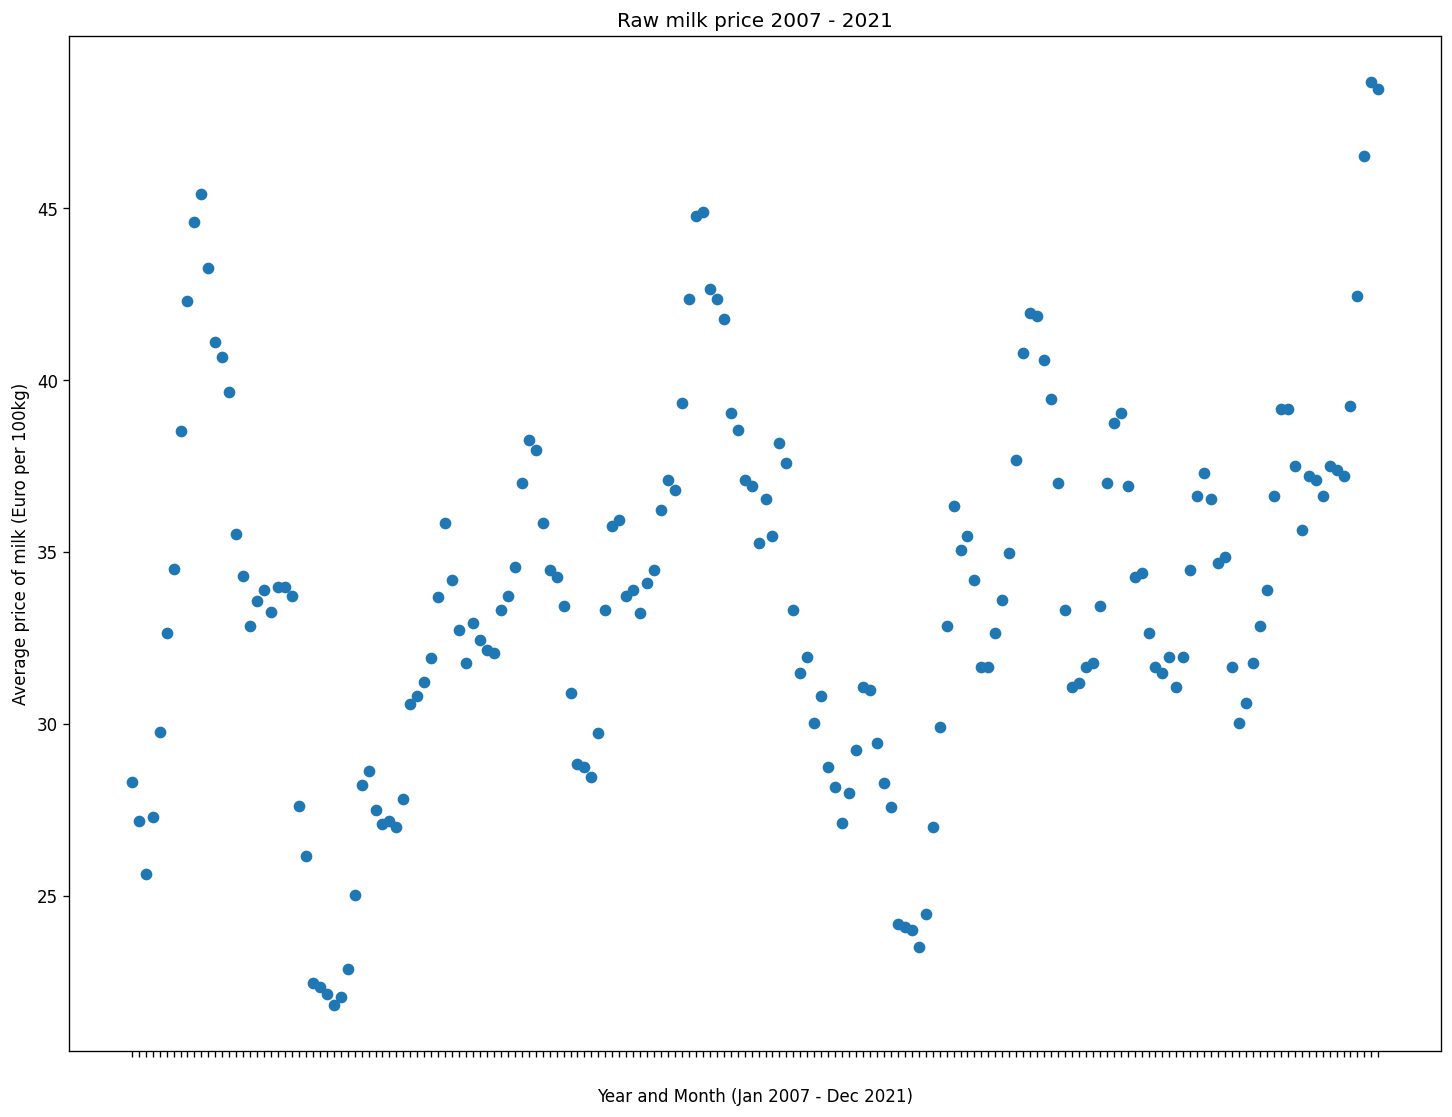

In [46]:
df1['Date'] = df1['Month'].map(str)+ '-' +df1['Year'].map(str)
df1['Date'] = pd.to_datetime(df1['Date'], format='%m-%Y').dt.strftime('%m-%Y')


figure(figsize=(12, 9), dpi=120)

X = df1["Date"]
y = df1["Raw milk price"]

print(len(X), len(y))

plt.scatter(X, y)
plt.tight_layout()
plt.xticks(color="None")
plt.title("Raw milk price 2007 - 2021")
plt.ylabel("Average price of milk (Euro per 100kg)")
plt.xlabel("Year and Month (Jan 2007 - Dec 2021)")
plt.show()

In [31]:
len(X)

180

In [32]:
len(y)

180